Importamos las librerias necesarias y leemos el archivo.

In [152]:
# Agregar la inflacion a los ingresos
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [163]:
# Accesos por tecnologia
axt = pd.read_csv('../data/crudo/acc_x_tecnologia.csv')
axt['Año'] = axt['Año'].astype(str).str.replace('*', '', regex=False).str.strip() # Quitar los * , '' de 2019
axt['Año'] = pd.to_datetime(axt['Año'], format='%Y') # Formato fecha

## Análisis del Crecimiento Total de Conectividades por Año

Este análisis comienza con el objetivo de entender cómo ha evolucionado el número de conexiones de internet en Argentina, abarcando tecnologías como ADSL, Cablemódem, Fibra Óptica, Wireless, y otras. El enfoque principal está en el crecimiento real de usuarios año tras año, lo que nos permite observar tendencias sin ser afectados por distorsiones en los ingresos provocadas por la alta inflación en Argentina.

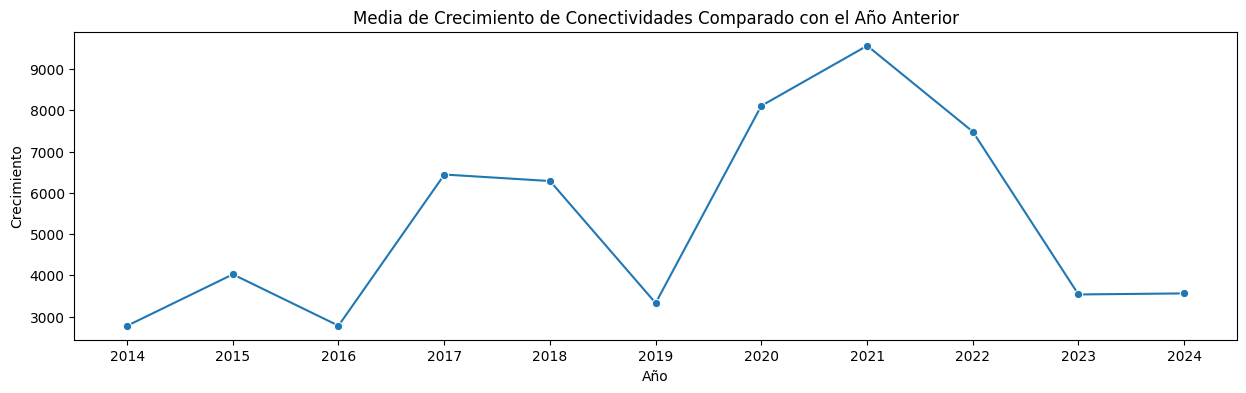

In [179]:
# Agrupar por provincia y año y calcular la suma total de conexiones
total_x_prov = axt.groupby(['Provincia', 'Año', 'Trimestre']).agg({'Total': 'sum'}).reset_index()
# Calcular el crecimiento de conexiones por provincia
total_x_prov['Crecimiento'] = total_x_prov.groupby('Provincia')['Total'].diff()

fig, ax = plt.subplots(figsize=(15,4))

sns.lineplot(data=total_x_prov, x='Año', y='Crecimiento', marker='o', errorbar=None)
ax.set_title('Media de Crecimiento de Conectividades Comparado con el Año Anterior', fontsize=12)

plt.show()

## Conclusiones del Análisis de Crecimiento de Conexiones (2014-2024)

- **Tendencia Cíclica:** El crecimiento de conexiones muestra un patrón cíclico, con aumentos sostenidos durante dos años seguidos seguidos de descensos recurrentes. Basando en la tendencia actual, 2024 podria ser un año positivo para el crecimiento.

- **Relación con COVID-19:** Se observa un notable aumento en 2020-2021, probablemente impulsado por la pandemia y el incremento en la demanda de conectividad debido al trabajo remoto y la educación a distancia.

- **Situación Actual:** El crecimiento de conectividad en 2024 se mantiene al nivel de 2015, sugiriendo una estabilización en comparación con los picos anteriores.

**Nota:** Este análisis refleja la media del crecimiento de conexiones y puede estar influenciado por eventos específicos en distintas provincias.

El análisis indica que el crecimiento de conectividad sigue ciclos de aumento y disminución, afectados por eventos externos y cambios en la demanda. La media calculada puede no reflejar variaciones significativas a nivel provincial.


In [98]:
# Agrupar el total de conexiones por provincia mostrando su menor y su maximo.
total_x_prov = axt.groupby('Provincia').agg({'Total': ['min','max']}).reset_index()
total_x_prov.columns = ['provincia', 'total_Min', 'total_Max']
total_x_prov_ord = total_x_prov.sort_values(by='total_Max')

# 3 provincias con menos conectividad total.
menor = total_x_prov_ord.head(3)
#print(total_x_prov_ord.shape[0]) # Si 24 son las provincias. Entonces tomaremos las filas 11,12,13 que son el medio
medio = total_x_prov_ord.iloc[10:13]
# 3 provincias con mejor conectividad.
mayor = total_x_prov_ord.tail(3)

### Selección de Provincias para el Análisis

Para simplificar y mejorar la claridad del análisis de conectividad, hemos decidido no incluir las 23 provincias + (CABA) en los gráficos de conectividad anual, ya que esto podría resultar en visualizaciones sobrecargadas y difíciles de interpretar. En su lugar, se seleccionarán las provincias en función de su nivel de conectividad:

- **Provincias con menor conectividad**: Seleccionaremos 3 provincias que presenten los niveles más bajos de acceso a internet. Analizar estas provincias nos permitirá identificar los desafíos y barreras que afectan la baja conectividad.

- **Provincias con conectividad media**: Elegiremos 3 provincias que representen un nivel intermedio de conectividad. Este grupo ayudará a entender las condiciones en áreas con conectividad promedio y proporcionará un punto de referencia para comparación.

- **Provincias con mayor conectividad**: Seleccionaremos 3 provincias con los niveles más altos de acceso a internet. Analizar estas provincias nos permitirá observar las mejores prácticas y factores que contribuyen a una alta conectividad.

Al centrarnos en estos 9 casos representativos (3 de menor, 3 de media, y 3 de mayor conectividad), podremos realizar un análisis más claro y manejable, extrayendo insights valiosos sobre las diferencias en conectividad a lo largo del tiempo en diferentes regiones del país.


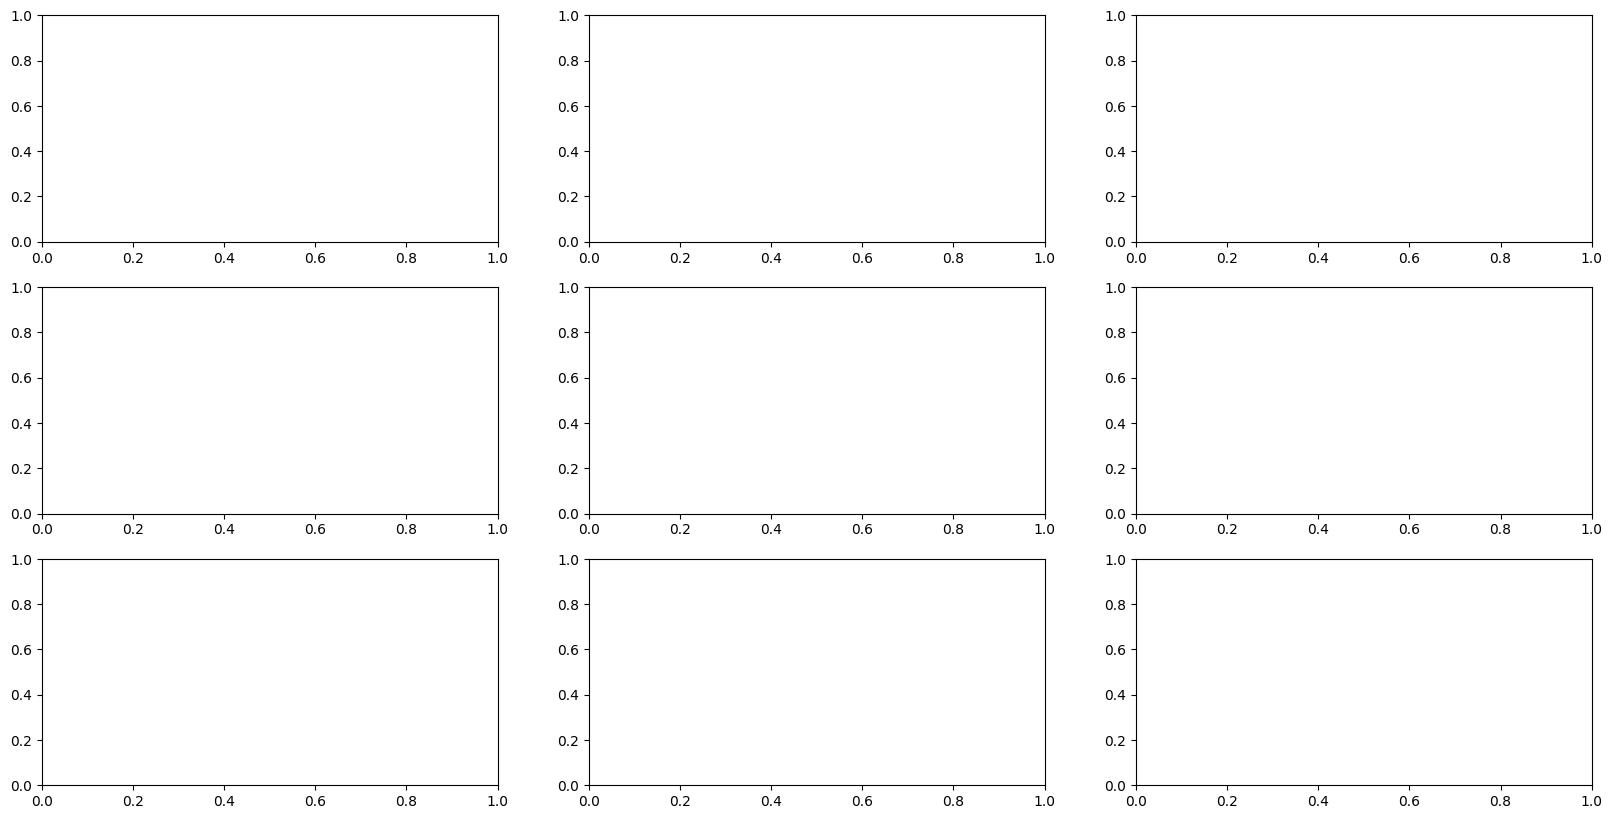

In [95]:
fig, ax = plt.subplots(3,3, figsize=(20,10))

# Definir provincias para cada tipo de conectividad
axt['Conectividad'] = 'no_aplica'
menos_conectividad = ['Tierra Del Fuego', 'Formosa', 'Catamarca']
media_conectividad = ['San Luis', 'Corrientes', 'Neuquén']
mayor_conectividad = ['Córdoba', 'Capital Federal', 'Buenos Aires']

# Transformar el DataFrame a formato largo
df_melted = pd.melt(axt, id_vars=['Provincia', 'Conectividad'], 
                     value_vars=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros'],
                     var_name='Tipo_Conexion', value_name='Conexiones')

plt.show()